<a href="https://colab.research.google.com/github/bhupeshmahara/analyticsvidhya/blob/main/Car_Rental_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# allow plots to appear directly in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv("https://raw.githubusercontent.com/bhupeshmahara/analyticsvidhya/main/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/bhupeshmahara/analyticsvidhya/main/test.csv")
sample = pd.read_csv("https://raw.githubusercontent.com/bhupeshmahara/analyticsvidhya/main/sample.csv")
print(train.shape)
print(test.shape)
print(sample.shape)

(18247, 3)
(7650, 2)
(7650, 3)


In [7]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [9]:
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [10]:
train['year'] = pd.DatetimeIndex(train['date']).year
train['month'] = pd.DatetimeIndex(train['date']).month
train['day'] = pd.DatetimeIndex(train['date']).day
train.head()

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,8,18
1,2018-08-18,10,21,2018,8,18
2,2018-08-18,13,23,2018,8,18
3,2018-08-18,14,104,2018,8,18
4,2018-08-18,15,81,2018,8,18


In [11]:
train.describe()

,hour,demand,year,month,day
count,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000
mean,12.614731,73.991451,2019.396997,6.470324,15.782430
std,6.544963,41.678988,0.810979,3.618189,8.772904
min,0.000000,1.000000,2018.000000,1.000000,1.000000
25%,8.000000,43.000000,2019.000000,3.000000,8.000000
50%,13.000000,71.000000,2019.000000,7.000000,16.000000
75%,18.000000,98.000000,2020.000000,10.000000,23.000000
max,23.000000,379.000000,2021.000000,12.000000,31.000000


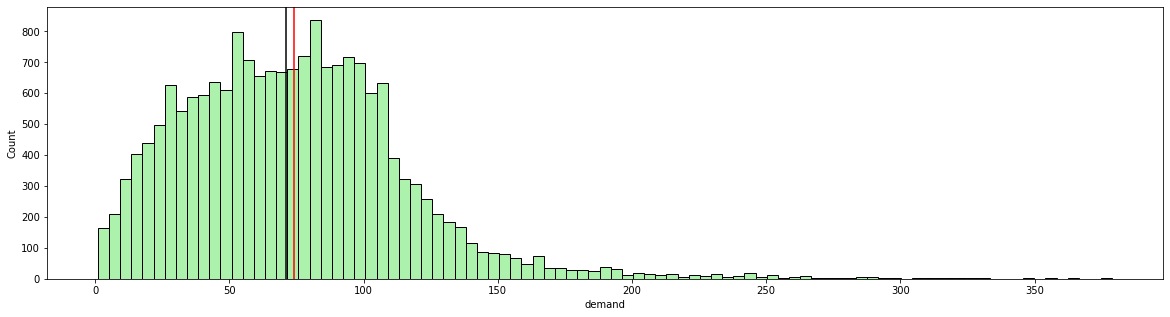

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.histplot(train.demand, color='lightgreen', ax=ax)
plt.axvline(train.demand.mean(), color='red')
plt.axvline(train.demand.median(), color='black')
plt.show()

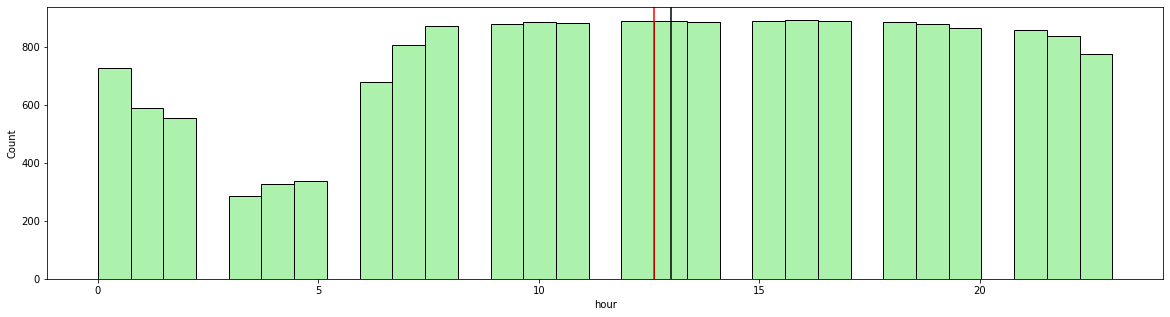

In [13]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.histplot(train.hour, color='lightgreen')
plt.axvline(train.hour.mean(), color='red')
plt.axvline(train.hour.median(), color='black')
plt.show()

In [14]:
train.corr()

,hour,demand,year,month,day
hour,1.000000,0.161498,-0.043771,0.019039,0.003022
demand,0.161498,1.000000,0.041879,0.041036,-0.033689
year,-0.043771,0.041879,1.000000,-0.487684,-0.028902
month,0.019039,0.041036,-0.487684,1.000000,0.022906
day,0.003022,-0.033689,-0.028902,0.022906,1.000000


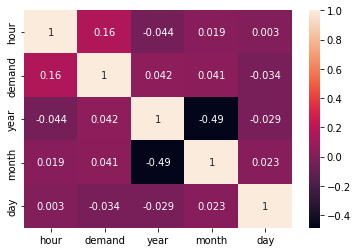

In [15]:
sns.heatmap(train.corr(), annot=True);

In [16]:
train.columns

Index(['date', 'hour', 'demand', 'year', 'month', 'day'], dtype='object')

In [17]:
feature_cols = ['day', 'month', 'year', 'hour']
X = train[feature_cols]
X.head()

,day,month,year,hour
0,18,8,2018,9
1,18,8,2018,10
2,18,8,2018,13
3,18,8,2018,14
4,18,8,2018,15


In [18]:
y = train['demand']
y.head()

0     91
1     21
2     23
3    104
4     81
Name: demand, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
X_train.head()

,day,month,year,hour
18081,21,2,2021,14
2618,6,1,2019,2
6768,27,7,2019,10
2912,20,1,2019,16
12521,6,5,2020,20


In [21]:
y_train.head()

18081    117
2618     122
6768      99
2912     110
12521     54
Name: demand, dtype: int64

In [22]:
X_test.head()

,day,month,year,hour
12885,23,5,2020,7
6710,24,7,2019,1
9486,17,12,2019,2
13064,31,5,2020,12
10367,28,1,2020,12


In [23]:
y_test.head()

12885     62
6710      39
9486       2
13064    255
10367     85
Name: demand, dtype: int64

In [24]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14597, 4)
y_train shape:  (14597,)

Test cases as below
X_test shape:  (3650, 4)
y_test shape:  (3650,)


In [25]:
X_train.describe()

,day,month,year,hour
count,14597.000000,14597.000000,14597.000000,14597.000000
mean,15.774269,6.449133,2019.396657,12.581147
std,8.781252,3.625783,0.811476,6.542885
min,1.000000,1.000000,2018.000000,0.000000
25%,8.000000,3.000000,2019.000000,8.000000
50%,16.000000,7.000000,2019.000000,13.000000
75%,23.000000,10.000000,2020.000000,18.000000
max,31.000000,12.000000,2021.000000,23.000000


In [26]:
X_test.describe()

,day,month,year,hour
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,15.815068,6.555068,2019.398356,12.749041
std,8.740562,3.586898,0.809100,6.552445
min,1.000000,1.000000,2018.000000,0.000000
25%,9.000000,3.000000,2019.000000,8.000000
50%,16.000000,7.000000,2019.000000,13.000000
75%,23.000000,10.000000,2020.000000,18.000000
max,31.000000,12.000000,2021.000000,23.000000


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['day', 'month', 'year', 'hour']] = scaler.fit_transform(X_train)
X_test[['day', 'month', 'year', 'hour']] = scaler.transform(X_test)

In [28]:
X_train.head()

,day,month,year,hour
18081,0.595121,-1.227124,1.975904,0.216862
2618,-1.113122,-1.502936,-0.488826,-1.617254
6768,1.278419,0.151936,-0.488826,-0.394510
2912,0.481238,-1.502936,-0.488826,0.522548
12521,-1.113122,-0.399688,0.743539,1.133920


In [30]:
X_test.head()

,day,month,year,hour
12885,0.822887,-0.399688,0.743539,-0.853039
6710,0.936770,0.151936,-0.488826,-1.770097
9486,0.139590,1.530995,-0.488826,-1.617254
13064,1.733950,-0.399688,0.743539,-0.088824
10367,1.392301,-1.502936,0.743539,-0.088824


In [31]:
y_train.head()

18081    117
2618     122
6768      99
2912     110
12521     54
Name: demand, dtype: int64

In [32]:
y_test.head()

12885     62
6710      39
9486       2
13064    255
10367     85
Name: demand, dtype: int64

In [33]:
from sklearn.linear_model import LinearRegression

# Create an object of LinearRegression()
regressor = LinearRegression()

# Study on (X_train, y_train) i.e. fit()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
regressor.intercept_

73.92471055696397

In [35]:
regressor.coef_

array([-1.48990724,  3.38379404,  3.83162136,  6.98627112])